In [1]:
#Problem 1
import numpy as np
#Choose rule number
rule_number = 30
rule_string = np.binary_repr(rule_number, 8)
rule = np.array([int(bit) for bit in rule_string])
print(rule)

for i in range(8):
    triplet = np.binary_repr(i, 3)
    print(f"input:{triplet}, index:{7-i}, output {rule[7-i]}")

#Define rule with L = left cell, C = center cell, R = right cell
def rule_index(triplet):
    L, C, R = triplet
    index = 7 - (4*L + 2*C + R)
    return int(index)

def CA_run(initial_state, n_steps, rule_number):
    rule_string = np.binary_repr(rule_number, 8)
    rule = np.array([int(bit) for bit in rule_string])

    m_cells = len(initial_state)
    CA_run = np.zeros((n_steps, m_cells))
    CA_run[0, :] = initial_state

    for step in range(1, n_steps):
        all_triplets = np.stack(
            [
                np.roll(CA_run[step - 1, :], 1),
                CA_run[step - 1, :],
                np.roll(CA_run[step - 1, :], -1),
            ]
        )
        CA_run[step, :] = rule[np.apply_along_axis(rule_index, 0, all_triplets)]

    return CA_run

initial = np.array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0])
data = CA_run(initial, 25, 30)
print(data)

[0 0 0 1 1 1 1 0]
input:000, index:7, output 0
input:001, index:6, output 1
input:010, index:5, output 1
input:011, index:4, output 1
input:100, index:3, output 1
input:101, index:2, output 0
input:110, index:1, output 0
input:111, index:0, output 0
[[0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0.]
 [1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.]
 [1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1.]
 [1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1.]
 [0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1.]
 [0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0.]
 [1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0

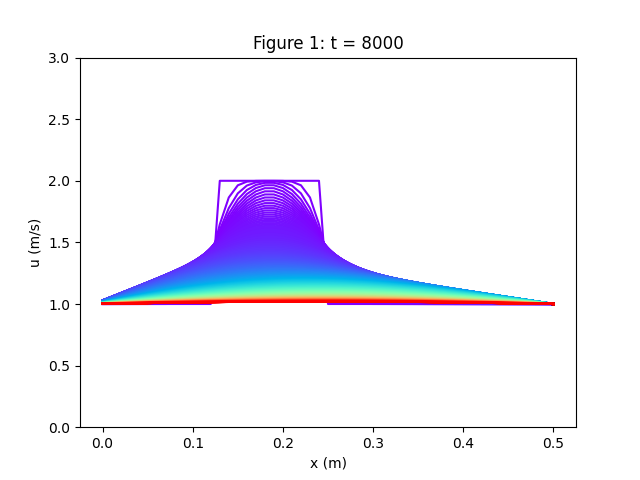

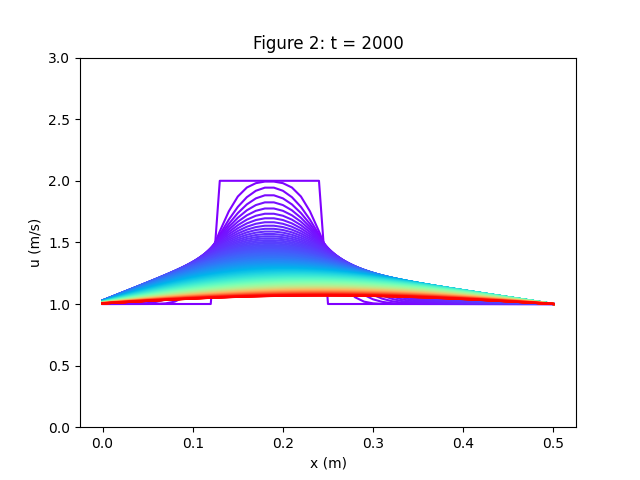

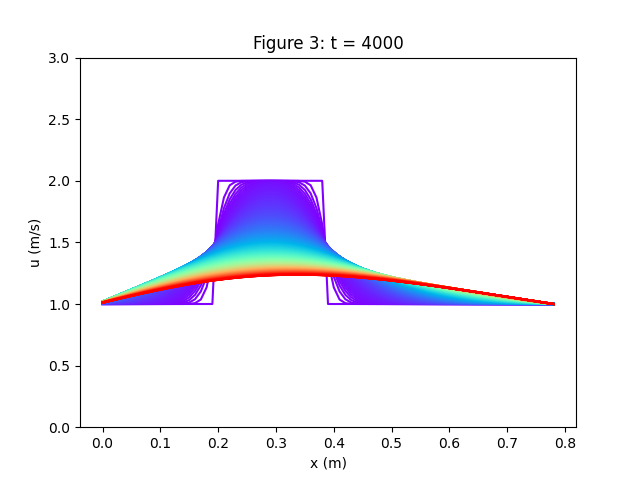

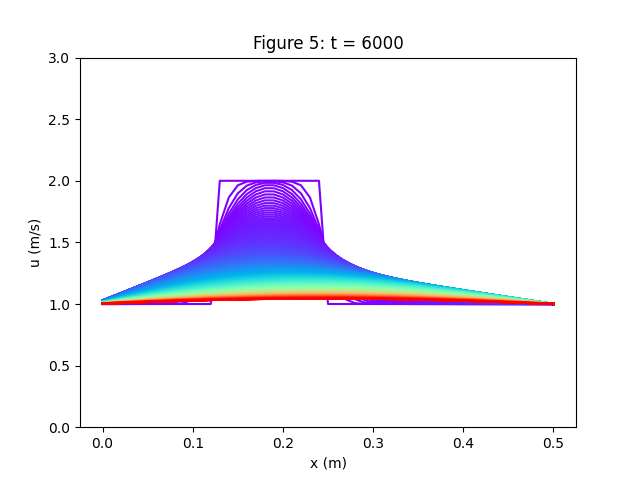

In [2]:
#Problem 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
def diffusion(nt, nx, tmax, xmax, nu = 0.03):

   # Increments - initial conditions
   dt = 0.0001
   dx = 0.01

   # Create empty array for u and x
   u = np.zeros((nx,nt))
   x = np.zeros(nx)

   # Boundary conditions
   u[0,:] = u[nx-1,:] = 1

   # Initial conditions
   for i in range(1,nx-1):
      if(i > (nx-1)/4 and i < (nx-1)/2):
         u[i,0] = 2
      else:
         u[i,0] = 1

   # Loop
   for n in range(0,nt-1):
      for i in range(0,nx-1):
         u[i,n+1] = u[i,n] + nu*(dt/dx**2.0)*(u[i+1,n]-2.0*u[i,n]+u[i-1,n])

   # X Loop
   for i in range(0,nx):
      x[i] = i*dx

   return u, x

#Plot diffusion equation with different time steps
def plot_diffusion(u,x,nt,title):
   plt.figure()
   colour=iter(cm.rainbow(np.linspace(0,10,nt)))
   for i in range(0,nt,10):
      c=next(colour)
      plt.plot(x,u[:,i],c=c)
   plt.xlabel('x (m)')
   plt.ylabel('u (m/s)')
   plt.ylim([0,3.0])
   plt.title(title)
   plt.show()

u,x = diffusion(8000, 51, 0.5, 2.0, 0.1)
plot_diffusion(u,x,8000,'Figure 1: t = 8000')

u,x = diffusion(2000, 51, 0.5, 2.0, 0.242)
plot_diffusion(u,x,2000,'Figure 2: t = 2000')

u,x = diffusion(4000, 79, 0.5, 2.0, 0.1)
plot_diffusion(u,x,4000,'Figure 3: t = 4000')

u,x = diffusion(6000, 51, 1.217, 2.0, 0.1)
plot_diffusion(u,x,6000,'Figure 5: t = 6000')

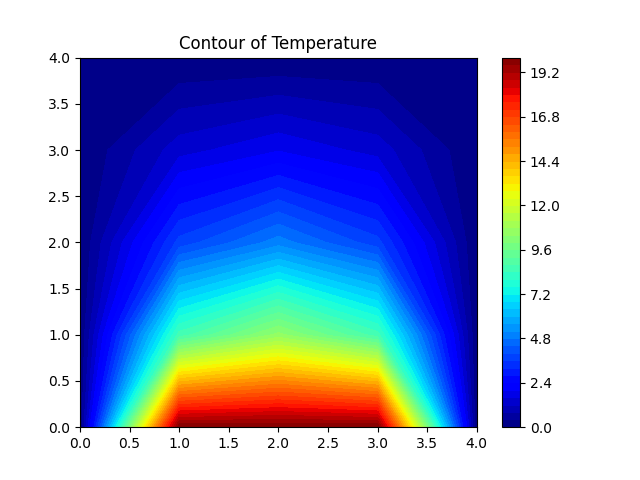

In [3]:
#Problem 3
import numpy as np
import matplotlib.pyplot as plt

# Set maximum iteration
maxIter = 500

# Set Dimension and delta
# make a box with x = 4 and y = 3 based on initial conditions
lenX = lenY = 5
delta = 1

# Boundary conditions
Ttop = 0
Tbottom = 20
Tleft = 0
Tright = 0

# Initial guess of interior grid
Tguess = 30

# Set colour interpolation and colour map
colorinterpolation = 50
colourMap = plt.cm.jet 

# Set meshgrid
X, Y = np.meshgrid(np.arange(0, lenX), np.arange(0, lenY))

# Set array size and set the interior value with Tguess
T = np.empty((lenX, lenY))
T.fill(Tguess)

# Set Boundary condition
T[(lenY-1):, :] = Ttop
T[:1, :] = Tbottom
T[:, (lenX-1):] = Tright
T[:, :1] = Tleft

# Iteration (We assume that the iteration is convergence in maxIter = 500)
for iteration in range(0, maxIter):
    for i in range(1, lenX-1, delta):
        for j in range(1, lenY-1, delta):
            T[i, j] = 0.25 * (T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1])


# Configure the contour
plt.title("Contour of Temperature")
plt.contourf(X, Y, T, colorinterpolation, cmap=colourMap)

# Set Colorbar
plt.colorbar()

# Show the result in the plot window
plt.show()

